# Assignment 3
### Due 9/21. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [1]:
import pandas as pd
import numpy as np

nhanes  = pd.read_csv('/Users/adamchow/Library/CloudStorage/Box-Box/UVA/MSDS/Fall 2025/DS 5030/Assignments/practice1/data/nhanes_data_17_18.csv')
nhanes.head()

/var/folders/8j/b374spys48z0_v4q1g1pr4bc0000gn/T/ipykernel_28820/712252106.py:4: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes  = pd.read_csv('/Users/adamchow/Library/CloudStorage/Box-Box/UVA/MSDS/Fall 2025/DS 5030/Assignments/practice1/data/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. `HowOftenDoYouSnore`: There are a total of 2969 missing values in this column, with 4 main distinct responses:
    1. `Frequently - 5 or more nights a week`
    2. `Occasionally - 3-4 nights a week`
    3. `Rarely - 1-2 nights a week`
    4. `Never`

2. `HowOftenFeelOverlySleepyDuringDay`: There are a total of 2550 missing values in this column, with 5 main distinct responses:
    1. `Almost always - 16-30 times a month`
    2. `Often- 5-15 times a month`
    3. `Sometimes - 2-4 times a month`
    4. `Rarely - 1 time a month`
    5. `Never`

In [2]:
nhanes['Snore_na'] = nhanes['HowOftenDoYouSnore'].isna() # Create a missing value dummy
nhanes['Snore_na'].value_counts() # How many missings?

Snore_na
False    5397
True     2969
Name: count, dtype: int64

In [3]:
nhanes['Sleepy_na'] = nhanes['HowOftenFeelOverlySleepyDuringDay'].isna() # Create a missing value dummy
nhanes['Sleepy_na'].value_counts() # How many missings?

Sleepy_na
False    5816
True     2550
Name: count, dtype: int64

In [4]:
pd.crosstab(nhanes['HowOftenDoYouSnore'], nhanes['HowOftenFeelOverlySleepyDuringDay']) # Raw cross tabulation

HowOftenFeelOverlySleepyDuringDay,Almost always - 16-30 times a month,Never,Often- 5-15 times a month,Rarely - 1 time a month,Sometimes - 2-4 times a month
HowOftenDoYouSnore,,,,,
Frequently - 5 or more nights a week,189,201,307,310,499
Never,112,344,244,406,475
Occasionally - 3-4 nights a week,69,157,170,225,395
Rarely - 1-2 nights a week,93,187,219,342,447


2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

,GeneralHealthCondition,Mean,Standard Deviation,Count,Minimum,25th Percentile,Median,75th Percentile,Maximum
0,Excellent,7.809619,1.440531,499,2.0,7.0,8.0,8.5,14.0
1,Fair or,7.593583,1.822687,1122,2.0,6.5,7.5,9.0,14.0
2,Good,7.590000,1.619485,2250,2.0,6.5,7.5,8.5,14.0
3,Poor?,7.605590,2.158855,161,2.0,6.5,7.5,9.0,13.0
4,Very good,7.663569,1.559346,1345,2.0,7.0,8.0,8.5,14.0


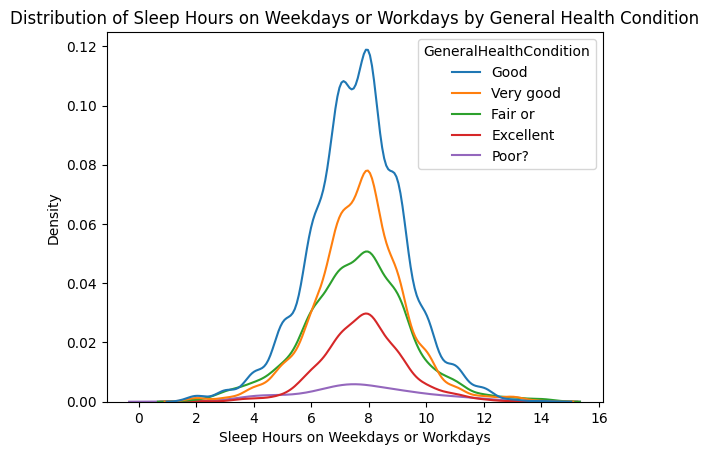

In [ ]:
# Categorical: `GeneralHealthCondition`
# Numerical: `SLeepHoursWeekdaysOrWorkdays`

# Descriptive Tables of Numeric on Categorical
grouped_data = (
    nhanes.groupby('GeneralHealthCondition')['SleepHoursWeekdaysOrWorkdays']
    .agg([
        ('Mean', 'mean'),
        ('Standard Deviation', 'std'),
        ('Count', 'count'),
        ('Minimum', 'min'),
        ('25th Percentile', lambda x: x.quantile(0.25)),
        ('Median', 'median'),
        ('75th Percentile', lambda x: x.quantile(0.75)),
        ('Maximum', 'max')
    ])
    .reset_index()
    .dropna()
)

display(grouped_data)

# KDE of Y conditional on X
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(x = nhanes['SleepHoursWeekdaysOrWorkdays'], hue = nhanes['GeneralHealthCondition'])
plt.xlabel('Sleep Hours on Weekdays or Workdays')
plt.title('Distribution of Sleep Hours on Weekdays or Workdays by General Health Condition')
plt.show()

I chose these two variables, because I thought there would be a difference in the overall distribution of sleep people get basedon their General Health Conditions, but it turns out from the table and the KDE that this is not true at all. There are slightl differences, but everyone is overall very normally distributed overall, despite the GHC of the person. Every GHC category shows roughly a 7.6 hour mean with around 1.7 hours of standard deviation.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

# Derivation:


**1**: Treat $\hat y(z)$ as a scalar parameter; differentiate and set derivative equal to zero:

$$
\frac{\partial}{\partial \hat y(z)}\mathrm{MSE}(\hat y(z))
= \frac{1}{N}\sum_{i=1}^N 2\bigl(\hat y(z)-y_i\bigr)\,\frac{1}{h}k\!\Bigl(\frac{z-x_i}{h}\Bigr)=0.
$$

Remove the constant factor $2/(N h)$ (nonzero) to get

$$
\sum_{i=1}^N \bigl(\hat y(z)-y_i\bigr)\,k\!\Bigl(\frac{z-x_i}{h}\Bigr)=0.
$$

Solve for $\hat y(z)$. First, expand the first term:

$$
\hat y(z)\sum_{i=1}^N k\!\Bigl(\frac{z-x_i}{h}\Bigr)
-\sum_{i=1}^N y_i\,k\!\Bigl(\frac{z-x_i}{h}\Bigr)=0.
$$

Isolate $\hat y(z)$:

$$
\hat y(z)
= \frac{\sum_{i=1}^N y_i\,k\!\bigl(\frac{z-x_i}{h}\bigr)}
{\sum_{i=1}^N k\!\bigl(\frac{z-x_i}{h}\bigr)}.
$$

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

In [15]:
college  = pd.read_csv('/Users/adamchow/Library/CloudStorage/Box-Box/UVA/MSDS/Fall 2025/DS 5030/Assignments/practice1/data/college_completion.csv')
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


Correlation: -0.19500662171060007


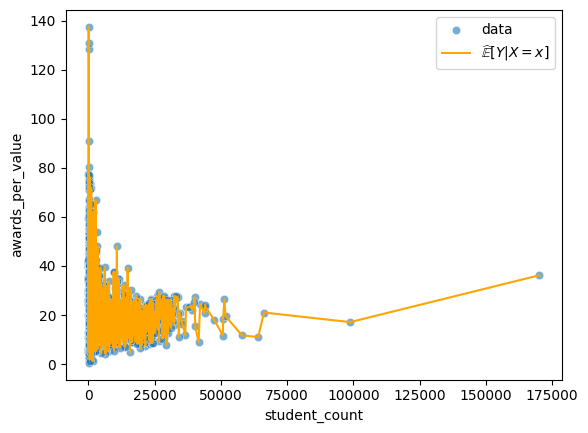

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot
sns.scatterplot(x='student_count', y='awards_per_value', data=college, alpha=0.6, label='data')

# Compute conditional expectation function (CEF)
means = (
    college
    .loc[:, ['student_count', 'awards_per_value']]
    .groupby('student_count')
    .mean()
    .reset_index()
)

# CEF line
sns.lineplot(data=means, x='student_count', y='awards_per_value',
             color='orange', label='$\\widehat{\\mathbb{E}}[Y|X=x]$')

# Correlation
correlation = pearsonr(college['student_count'], college['awards_per_value'])[0]
print("Correlation:", correlation)

plt.show()


The relationship between these two variables, `student_count` and `awards_per_value`, is very unlikely to be plausible. Without any other variables to provide context, we cannot draw any comcluisons about an institution's `awards_per_value` purely based on their `student_count` alone. Some of the main missing facotrs that we are failing to consider are probably the resources and alumni network of the institution, the funding per student, and program/major focuses like engineering or medical fields.

Even though these two variables don;t explicitly have a direct casual relationship, we can still use `studnet_count` to predict `awards_per_value` because there is a relationship, even if it is very weak. It's important that we don't intervene in the system to control the outcome because prediction models are only valid for forecasting future outcomes based on previous observations, not for manipulation. 